In [29]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
blog = """This article is about the Hindi film industry
For the entire film culture of India, see Cinema of India
For the tree species see Bollywood  Not to be confused with Hollywood
Indian cinema produced 1986 feature films with Bollywood as its largest filmmaker producing 64 Hindi films the same year
The most popular commercial genre in Bollywood since the 1970s has been the masala film"""

In [17]:
corpus = blog.lower().split('\n')

In [18]:
corpus

['this article is about the hindi film industry',
 'for the entire film culture of india, see cinema of india',
 'for the tree species see bollywood  not to be confused with hollywood',
 'indian cinema produced 1986 feature films with bollywood as its largest filmmaker producing 64 hindi films the same year',
 'the most popular commercial genre in bollywood since the 1970s has been the masala film']

In [19]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)

total_word = len(tokenizer.word_index)+1
print(total_word)

48


In [26]:
input_sequence=[]

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        sequence = token_list[:i+1]
        input_sequence.append(sequence)


In [27]:
max_sequence_len = max([len(line) for line in input_sequence])
print(max_sequence_len)

19


In [30]:
input_sequence = np.array(pad_sequences(input_sequence,maxlen=max_sequence_len,padding='pre'))
print(input_sequence)

[[ 0  0  0 ...  0 12 13]
 [ 0  0  0 ... 12 13 14]
 [ 0  0  0 ... 13 14 15]
 ...
 [ 0  0  0 ... 45 46  1]
 [ 0  0  0 ... 46  1 47]
 [ 0  0  0 ...  1 47  2]]


In [38]:
xs = input_sequence[:,:-1]
labels = input_sequence[:,-1]
ys = tf.keras.utils.to_categorical(labels,num_classes=total_word)

In [40]:
from tensorflow.keras.layers import LSTM,Embedding,Flatten,Dense,Bidirectional
from tensorflow.keras.models import Sequential


In [41]:
model = Sequential()
model.add(Embedding(total_word,64,input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_word,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#history = model.fit(xs, ys, epochs=500, verbose=1)

W0801 15:25:32.518180 14304 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0801 15:25:32.535135 14304 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0801 15:25:32.540127 14304 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype i

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 18, 64)            3072      
_________________________________________________________________
bidirectional (Bidirectional (None, 40)                13600     
_________________________________________________________________
dense (Dense)                (None, 48)                1968      
Total params: 18,640
Trainable params: 18,640
Non-trainable params: 0
_________________________________________________________________


In [44]:
history = model.fit(xs, ys, epochs=500, verbose=1)

W0801 15:26:16.147966 14304 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/500
60/60 [==============================] - 1s 12ms/sample - loss: 3.8721 - acc: 0.0000e+00
Epoch 2/500
60/60 [==============================] - 0s 416us/sample - loss: 3.8655 - acc: 0.0667
Epoch 3/500
60/60 [==============================] - 0s 499us/sample - loss: 3.8601 - acc: 0.0500
Epoch 4/500
60/60 [==============================] - 0s 549us/sample - loss: 3.8541 - acc: 0.1000
Epoch 5/500
60/60 [==============================] - 0s 432us/sample - loss: 3.8488 - acc: 0.1000
Epoch 6/500
60/60 [==============================] - 0s 532us/sample - loss: 3.8434 - acc: 0.1000
Epoch 7/500
60/60 [==============================] - 0s 532us/sample - loss: 3.8377 - acc: 0.1000
Epoch 8/500
60/60 [==============================] - 0s 615us/sample - loss: 3.8312 - acc: 0.1000
Epoch 9/500
60/60 [==============================] - 0s 549us/sample - loss: 3.8248 - acc: 0.1000
Epoch 10/500
60/60 [==============================] - 0s 565us/sample - loss: 3.8176 - acc: 0.1000
Epoch 11/500
60/

60/60 [==============================] - 0s 748us/sample - loss: 2.0554 - acc: 0.4500
Epoch 84/500
60/60 [==============================] - ETA: 0s - loss: 2.0513 - acc: 0.500 - 0s 632us/sample - loss: 2.0283 - acc: 0.4333
Epoch 85/500
60/60 [==============================] - 0s 665us/sample - loss: 2.0015 - acc: 0.4667
Epoch 86/500
60/60 [==============================] - 0s 615us/sample - loss: 1.9720 - acc: 0.4833
Epoch 87/500
60/60 [==============================] - 0s 532us/sample - loss: 1.9529 - acc: 0.5167
Epoch 88/500
60/60 [==============================] - 0s 748us/sample - loss: 1.9279 - acc: 0.5167
Epoch 89/500
60/60 [==============================] - 0s 615us/sample - loss: 1.9020 - acc: 0.5333
Epoch 90/500
60/60 [==============================] - 0s 582us/sample - loss: 1.8798 - acc: 0.5667
Epoch 91/500
60/60 [==============================] - 0s 665us/sample - loss: 1.8586 - acc: 0.5500
Epoch 92/500
60/60 [==============================] - 0s 615us/sample - loss: 1.8368

60/60 [==============================] - 0s 316us/sample - loss: 0.9248 - acc: 0.9500
Epoch 165/500
60/60 [==============================] - 0s 399us/sample - loss: 0.9185 - acc: 0.9500
Epoch 166/500
60/60 [==============================] - 0s 349us/sample - loss: 0.9111 - acc: 0.9500
Epoch 167/500
60/60 [==============================] - 0s 316us/sample - loss: 0.9033 - acc: 0.9500
Epoch 168/500
60/60 [==============================] - 0s 316us/sample - loss: 0.8961 - acc: 0.9500
Epoch 169/500
60/60 [==============================] - 0s 332us/sample - loss: 0.8874 - acc: 0.9500
Epoch 170/500
60/60 [==============================] - 0s 316us/sample - loss: 0.8847 - acc: 0.9500
Epoch 171/500
60/60 [==============================] - 0s 349us/sample - loss: 0.8743 - acc: 0.9500
Epoch 172/500
60/60 [==============================] - 0s 316us/sample - loss: 0.8699 - acc: 0.9500
Epoch 173/500
60/60 [==============================] - 0s 349us/sample - loss: 0.8680 - acc: 0.9500
Epoch 174/500


60/60 [==============================] - 0s 299us/sample - loss: 0.4954 - acc: 0.9833
Epoch 246/500
60/60 [==============================] - 0s 349us/sample - loss: 0.4916 - acc: 0.9833
Epoch 247/500
60/60 [==============================] - 0s 382us/sample - loss: 0.4890 - acc: 0.9833
Epoch 248/500
60/60 [==============================] - 0s 332us/sample - loss: 0.4832 - acc: 0.9833
Epoch 249/500
60/60 [==============================] - 0s 316us/sample - loss: 0.4825 - acc: 0.9833
Epoch 250/500
60/60 [==============================] - 0s 332us/sample - loss: 0.4786 - acc: 0.9833
Epoch 251/500
60/60 [==============================] - 0s 316us/sample - loss: 0.4749 - acc: 0.9833
Epoch 252/500
60/60 [==============================] - 0s 316us/sample - loss: 0.4697 - acc: 0.9833
Epoch 253/500
60/60 [==============================] - 0s 316us/sample - loss: 0.4695 - acc: 0.9833
Epoch 254/500
60/60 [==============================] - 0s 332us/sample - loss: 0.4620 - acc: 0.9833
Epoch 255/500


60/60 [==============================] - 0s 349us/sample - loss: 0.2729 - acc: 0.9833
Epoch 327/500
60/60 [==============================] - 0s 299us/sample - loss: 0.2705 - acc: 0.9833
Epoch 328/500
60/60 [==============================] - 0s 316us/sample - loss: 0.2701 - acc: 0.9833
Epoch 329/500
60/60 [==============================] - 0s 349us/sample - loss: 0.2678 - acc: 0.9833
Epoch 330/500
60/60 [==============================] - 0s 349us/sample - loss: 0.2661 - acc: 0.9833
Epoch 331/500
60/60 [==============================] - 0s 349us/sample - loss: 0.2640 - acc: 0.9833
Epoch 332/500
60/60 [==============================] - 0s 316us/sample - loss: 0.2623 - acc: 0.9833
Epoch 333/500
60/60 [==============================] - 0s 332us/sample - loss: 0.2606 - acc: 0.9833
Epoch 334/500
60/60 [==============================] - 0s 432us/sample - loss: 0.2591 - acc: 0.9833
Epoch 335/500
60/60 [==============================] - 0s 366us/sample - loss: 0.2579 - acc: 0.9833
Epoch 336/500


60/60 [==============================] - 0s 316us/sample - loss: 0.1859 - acc: 0.9833
Epoch 408/500
60/60 [==============================] - 0s 366us/sample - loss: 0.1843 - acc: 0.9833
Epoch 409/500
60/60 [==============================] - 0s 332us/sample - loss: 0.1830 - acc: 0.9833
Epoch 410/500
60/60 [==============================] - 0s 366us/sample - loss: 0.1822 - acc: 0.9833
Epoch 411/500
60/60 [==============================] - 0s 332us/sample - loss: 0.1809 - acc: 0.9667
Epoch 412/500
60/60 [==============================] - 0s 366us/sample - loss: 0.1797 - acc: 0.9833
Epoch 413/500
60/60 [==============================] - 0s 349us/sample - loss: 0.1787 - acc: 0.9833
Epoch 414/500
60/60 [==============================] - 0s 366us/sample - loss: 0.1777 - acc: 0.9833
Epoch 415/500
60/60 [==============================] - 0s 349us/sample - loss: 0.1767 - acc: 0.9833
Epoch 416/500
60/60 [==============================] - 0s 349us/sample - loss: 0.1761 - acc: 0.9833
Epoch 417/500


60/60 [==============================] - 0s 615us/sample - loss: 0.1272 - acc: 0.9667
Epoch 490/500
60/60 [==============================] - 0s 598us/sample - loss: 0.1266 - acc: 0.9667
Epoch 491/500
60/60 [==============================] - 0s 731us/sample - loss: 0.1261 - acc: 0.9833
Epoch 492/500
60/60 [==============================] - 0s 781us/sample - loss: 0.1253 - acc: 0.9833
Epoch 493/500
60/60 [==============================] - 0s 598us/sample - loss: 0.1251 - acc: 0.9833
Epoch 494/500
60/60 [==============================] - 0s 515us/sample - loss: 0.1243 - acc: 0.9833
Epoch 495/500
60/60 [==============================] - 0s 499us/sample - loss: 0.1239 - acc: 0.9833
Epoch 496/500
60/60 [==============================] - 0s 432us/sample - loss: 0.1236 - acc: 0.9833
Epoch 497/500
60/60 [==============================] - 0s 416us/sample - loss: 0.1232 - acc: 0.9667
Epoch 498/500
60/60 [==============================] - 0s 482us/sample - loss: 0.1225 - acc: 0.9667
Epoch 499/500


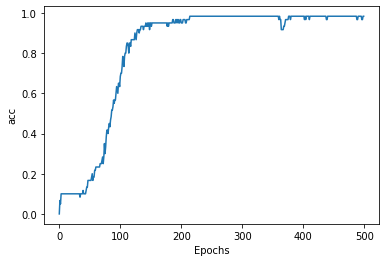

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
plot_graphs(history, 'acc')

In [54]:
seed_text = 'other Indian film industrie'
next_words = 5
word_index = tokenizer.word_index
for _ in range(next_words):
    token_line = tokenizer.texts_to_sequences([seed_text])[0]
    pad_sequences_token = pad_sequences([token_line],maxlen=max_sequence_len-1,padding='pre')
    predict = model.predict_classes(pad_sequences_token)
    output=''
    for word,index in word_index.items():
        if index==predict:
            output = word
            break
    seed_text+= ' '+output

In [55]:
seed_text

'other Indian film industrie cinema produced 1986 feature films'